In [3]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats



In [4]:
df = pd.read_csv('../W1/data/housing.csv')
df.head()

,Unnamed: 0,LSTAT,INDUS,NOX,RM,MEDV
0,0,4.98,2.31,0.538,6.575,24.0
1,1,9.14,7.07,0.469,6.421,21.6
2,2,4.03,7.07,0.469,7.185,34.7
3,3,2.94,2.18,0.458,6.998,33.4
4,4,5.33,2.18,0.458,7.147,36.2


In [9]:
model = smf.ols(formula = 'MEDV ~ LSTAT', data = df)
model = model.fit()
b0_ols = model.params[0]
b1_ols = model.params[1]

df['best_response'] = b0_ols + b1_ols * df['LSTAT']
df.head()

,Unnamed: 0,LSTAT,INDUS,NOX,RM,MEDV,best_response
0,0,4.98,2.31,0.538,6.575,24.0,29.822595
1,1,9.14,7.07,0.469,6.421,21.6,25.870390
2,2,4.03,7.07,0.469,7.185,34.7,30.725142
3,3,2.94,2.18,0.458,6.998,33.4,31.760696
4,4,5.33,2.18,0.458,7.147,36.2,29.490078


#### Assumptions behind linear regression model
1. Linearity 
2. independence
3. Normality
4. Equal Variance

##### Linearity

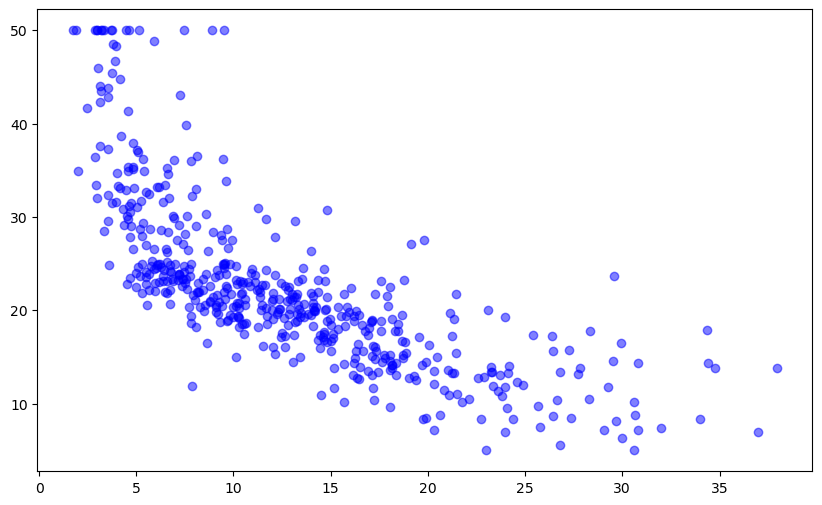

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['LSTAT'], df['MEDV'], color='blue', alpha=0.5)
plt.show()

##### Independence

In [14]:
# Calculate the residuals/errors
df['errors'] = df['MEDV'] - df['best_response']

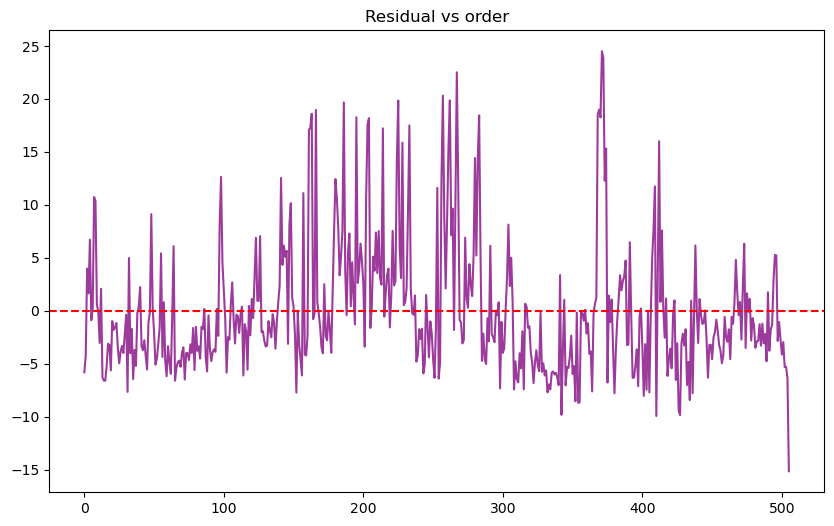

In [18]:
# Method 1: Residual vs order plot
plt.figure(figsize=(10, 6))
plt.title('Residual vs order')
plt.plot(df.index, df['errors'], color= 'purple', alpha=0.77)
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [19]:
# Method 2: Durbins-Watson test
# Check the Durbin Watson statistic
# Rule of thumb: test statistic value in the range of 1.5 to 2.5 are relatively normal

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           5.08e-88
Time:                        14:42:39   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Normality

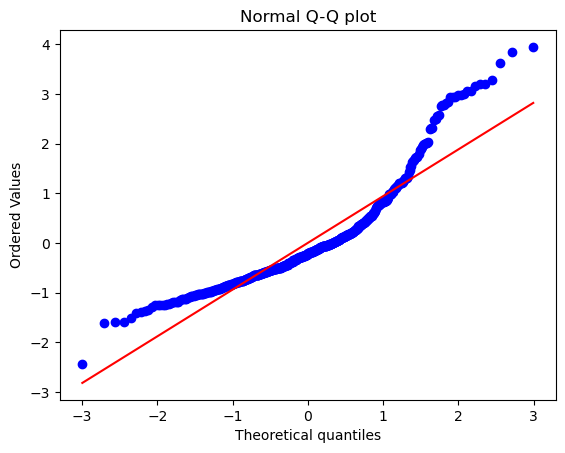

In [21]:
z = (df['errors'] - df['errors'].mean()) / df['errors'].std(ddof=1)

stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

##### Equal Variance

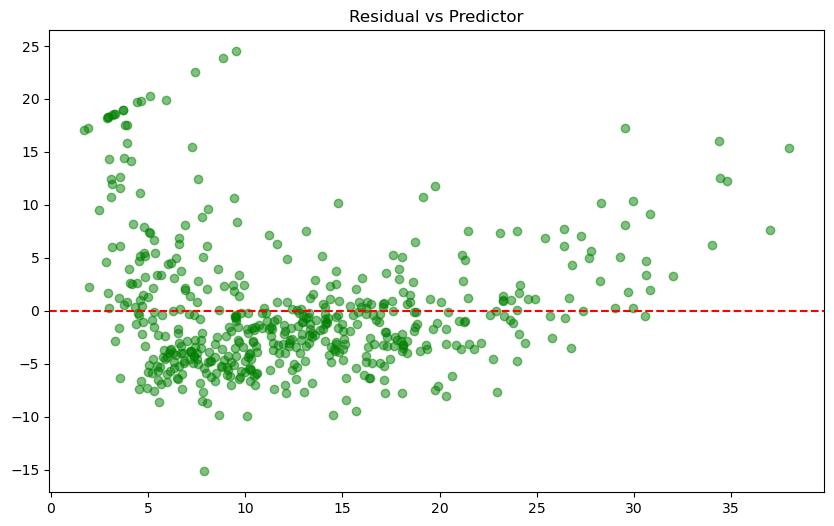

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(df['LSTAT'], df['errors'], color='g', alpha=0.5)
plt.title('Residual vs Predictor')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

#### We can see that the regression model (MEDV~LSTAT) violates all four assumptions. Therefore, we cannot make statistical inference using this model.